In [1]:
% matplotlib inline

import numpy as np
import pandas as pd
import seaflowpy as sfp
import mpld3 

import glob
import matplotlib.pyplot as plt


/Users/sclayton/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# set the wdirectory where the data is stored

datadir = "/Volumes/ceg/Sophie/bead_calibration/"

# select instrument
inst = 751
instdir = "%3d_caldata" % inst

indir = "%s%s" % (datadir, instdir)
regime = 'coastal' # or oligo
regime = 'oligo'

files = glob.glob('%s/*%s*.evt' % (indir, regime))

In [3]:
% matplotlib qt

fig1 = plt.figure(figsize=(20,20))

num_cols = len(files)

cm = plt.get_cmap('gist_rainbow')
#for i in range(num_cols):
#    color = cm(1.*i/num_cols)

cc = 0
for f in files:
    print f
    bead_data = sfp.EVT(f, transform=False, columns=["fsc_small", "D1","D2"])
    plt.scatter(bead_data.df['fsc_small'], bead_data.df['D2'], marker ='o', lw = 0, c = cm(1.*cc/num_cols), label = f)
    cc += 1

plt.xlabel('fsc_small')
plt.ylabel('D2')
plt.legend(loc = 'lower right')
plt.show()

/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_oligo_0.75um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_oligo_5.7um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_oligo_1.83um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_oligo_0.3um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_oligo_noise.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_oligo_3.1um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_oligo_0.5um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_oligo_1um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_oligo_0.18um.evt


In [4]:
# best guess of the points needed for the filter function
# this is for the 751 oligo test
guess = pd.DataFrame()
guess['fsc_small'] = [62100, 57600, 58000, 53500, 48200, 38300, 20200]
guess['D2'] = [48800, 39900, 34000, 26200, 23500, 16700, 5800]
guess['bead'] = [5.7,3.1, 1.83, 1.0, 0.75, 0.5, 0.3]

# try to fit a polynomial to bead data
z = np.polyfit(guess['fsc_small'], guess['D2'], 2)
p = np.poly1d(z)
xp = np.linspace(0, 7e04, 100)

guess = guess.sort(['bead'], ascending = 1)

small = guess[guess['bead']<=1]
big = guess[guess['bead']>=1]

# try to fit a polynomial to bead data
zs = np.polyfit(small['fsc_small'], small['D2'], 1)
ps = np.poly1d(zs)

zb = np.polyfit(big['fsc_small'], big['D2'], 1)
pb = np.poly1d(zb)

print "small", zs
print "big", zb

small [  6.20040037e-01  -6.78260347e+03]
big [  2.59039396e+00  -1.12499771e+05]


/Users/sclayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_oligo_0.75um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_oligo_5.7um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_oligo_1.83um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_oligo_0.3um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_oligo_noise.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_oligo_3.1um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_oligo_0.5um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_oligo_1um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_oligo_0.18um.evt


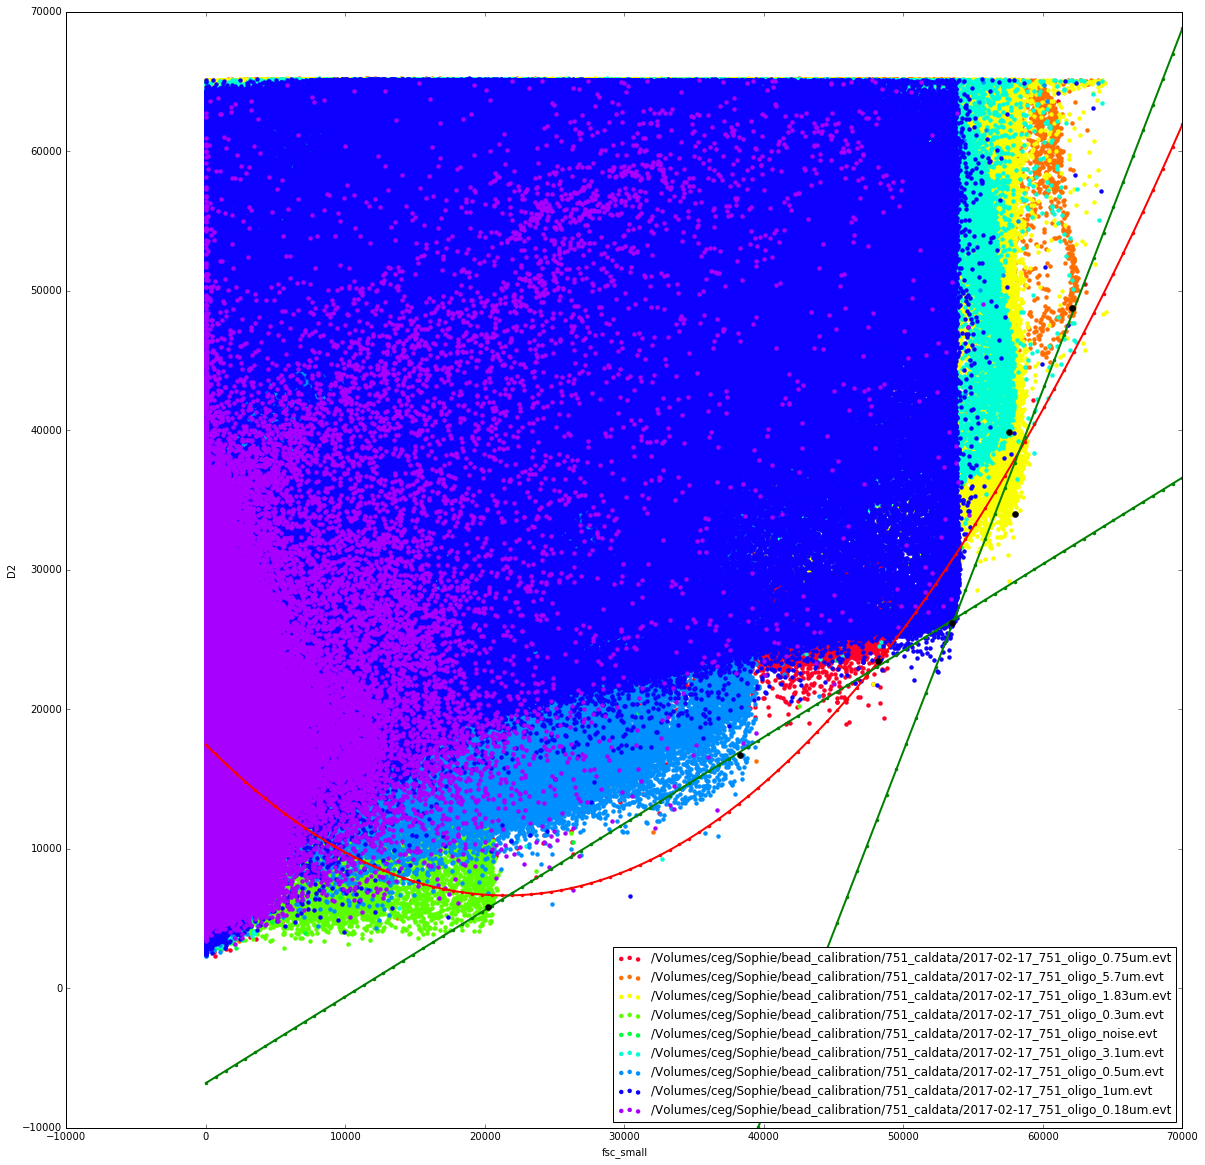

In [5]:
% matplotlib inline

fig1 = plt.figure(figsize=(20,20))

num_cols = len(files)

cm = plt.get_cmap('gist_rainbow')
#for i in range(num_cols):
#    color = cm(1.*i/num_cols)

cc = 0
for f in files:
    print f
    bead_data = sfp.EVT(f, transform=False, columns=["fsc_small", "D1","D2"])
    plt.scatter(bead_data.df['fsc_small'], bead_data.df['D2'], marker ='o', lw = 0, c = cm(1.*cc/num_cols), label = f)
    cc += 1

plt.xlabel('fsc_small')
plt.ylabel('D2')
plt.legend(loc = 'lower right')

plt.plot(xp, p(xp),'.-r', lw =2)
plt.plot(xp, ps(xp),'.-g', lw =2)
plt.plot(xp, pb(xp),'.-g', lw =2)
plt.plot(guess['fsc_small'], guess['D2'], 'ko')
plt.axis([-10000, 70000, -10000, 70000])
plt.show()

In [6]:
# select instrument
inst = 751
instdir = "%3d_caldata" % inst

indir = "%s%s" % (datadir, instdir)
regime = 'coastal' # or oligo
#regime = 'oligo'

files = glob.glob('%s/*%s*.evt' % (indir, regime))

/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_coastal_5.7um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_coastal_3.1um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_coastal_1um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_coastal_0.75.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-18_751_coastal_0.31um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_coastal_0.5.evt


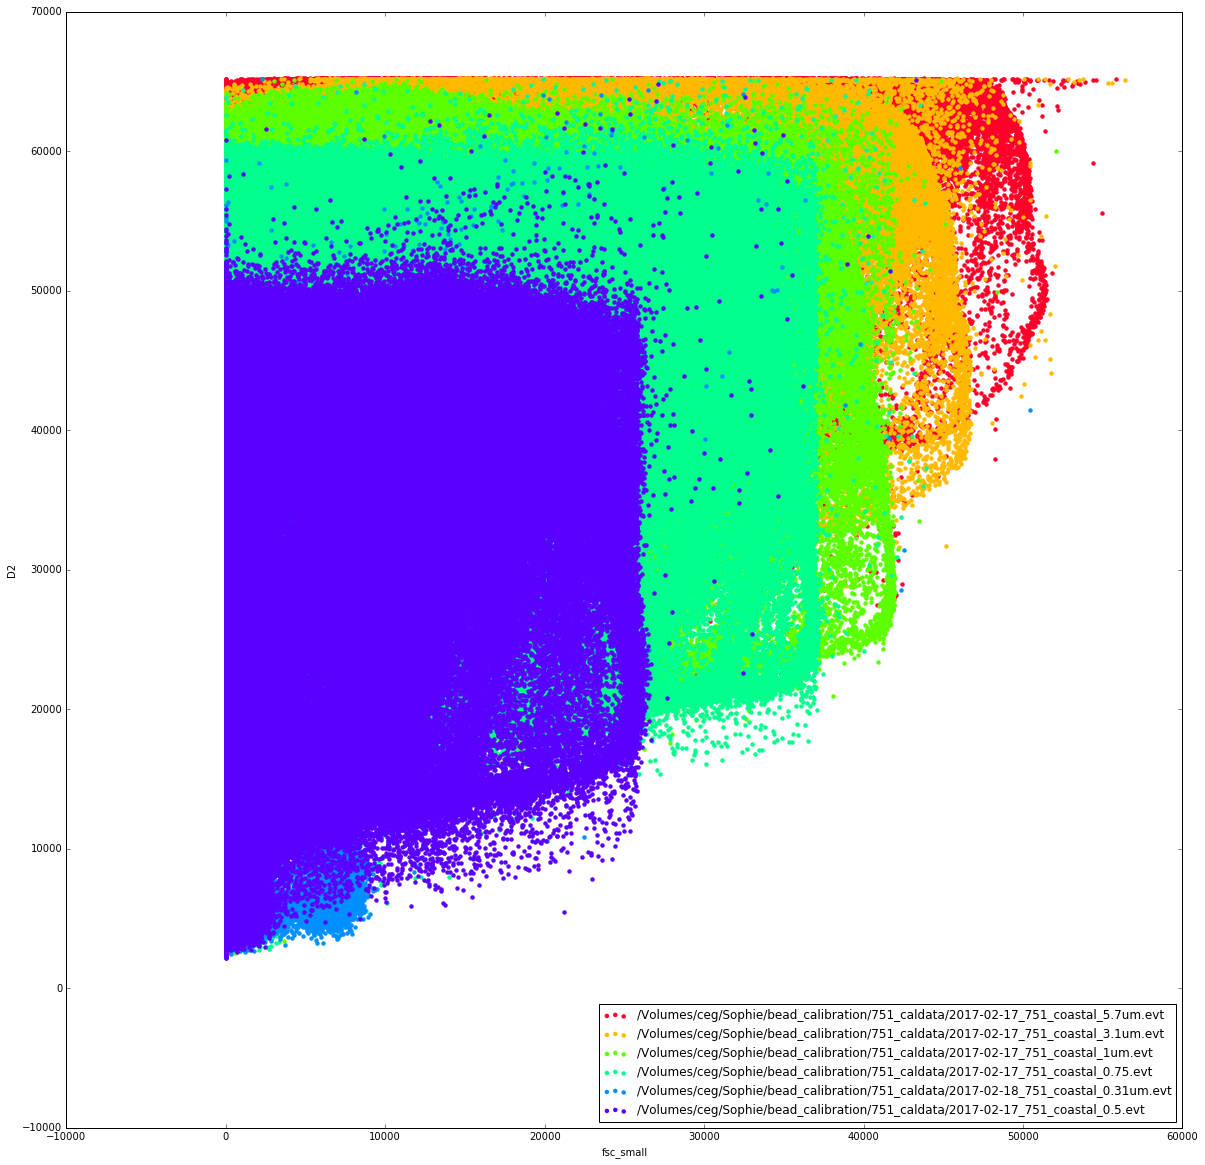

In [7]:
#% matplotlib qt

fig1 = plt.figure(figsize=(20,20))

num_cols = len(files)

cm = plt.get_cmap('gist_rainbow')
#for i in range(num_cols):
#    color = cm(1.*i/num_cols)

cc = 0
for f in files:
    print f
    bead_data = sfp.EVT(f, transform=False, columns=["fsc_small", "D1","D2"])
    plt.scatter(bead_data.df['fsc_small'], bead_data.df['D2'], marker ='o', lw = 0, c = cm(1.*cc/num_cols), label = f)
    cc += 1

plt.xlabel('fsc_small')
plt.ylabel('D2')
plt.legend(loc = 'lower right')
plt.show()

In [8]:
# best guess points for 751 coastal
#
guess2 = pd.DataFrame()
guess2['fsc_small'] = [51000, 46200, 41400, 36300, 25000, 8000]
guess2['D2'] = [48200, 38200, 25800, 22400, 15300, 4800]
guess2['bead'] = [5.7, 3.1, 1.0, 0.75, 0.5, 0.31]

# try to fit a polynomial to bead data
z = np.polyfit(guess2['fsc_small'], guess2['D2'], 2)
p = np.poly1d(z)
xp = np.linspace(0, 7e04, 100)

guess2 = guess2.sort(['bead'], ascending = 1)

small = guess2[guess2['bead']<=1]
big = guess2[guess2['bead']>=1]

# try to fit a polynomial to bead data
zs = np.polyfit(small['fsc_small'], small['D2'], 1)
ps = np.poly1d(zs)

zb = np.polyfit(big['fsc_small'], big['D2'], 1)
pb = np.poly1d(zb)

print "small", zs
print "big", zb

small [   0.62697147 -276.43553733]
big [  2.33333333e+00  -7.04000000e+04]


/Users/sclayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_coastal_5.7um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_coastal_3.1um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_coastal_1um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_coastal_0.75.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-18_751_coastal_0.31um.evt
/Volumes/ceg/Sophie/bead_calibration/751_caldata/2017-02-17_751_coastal_0.5.evt


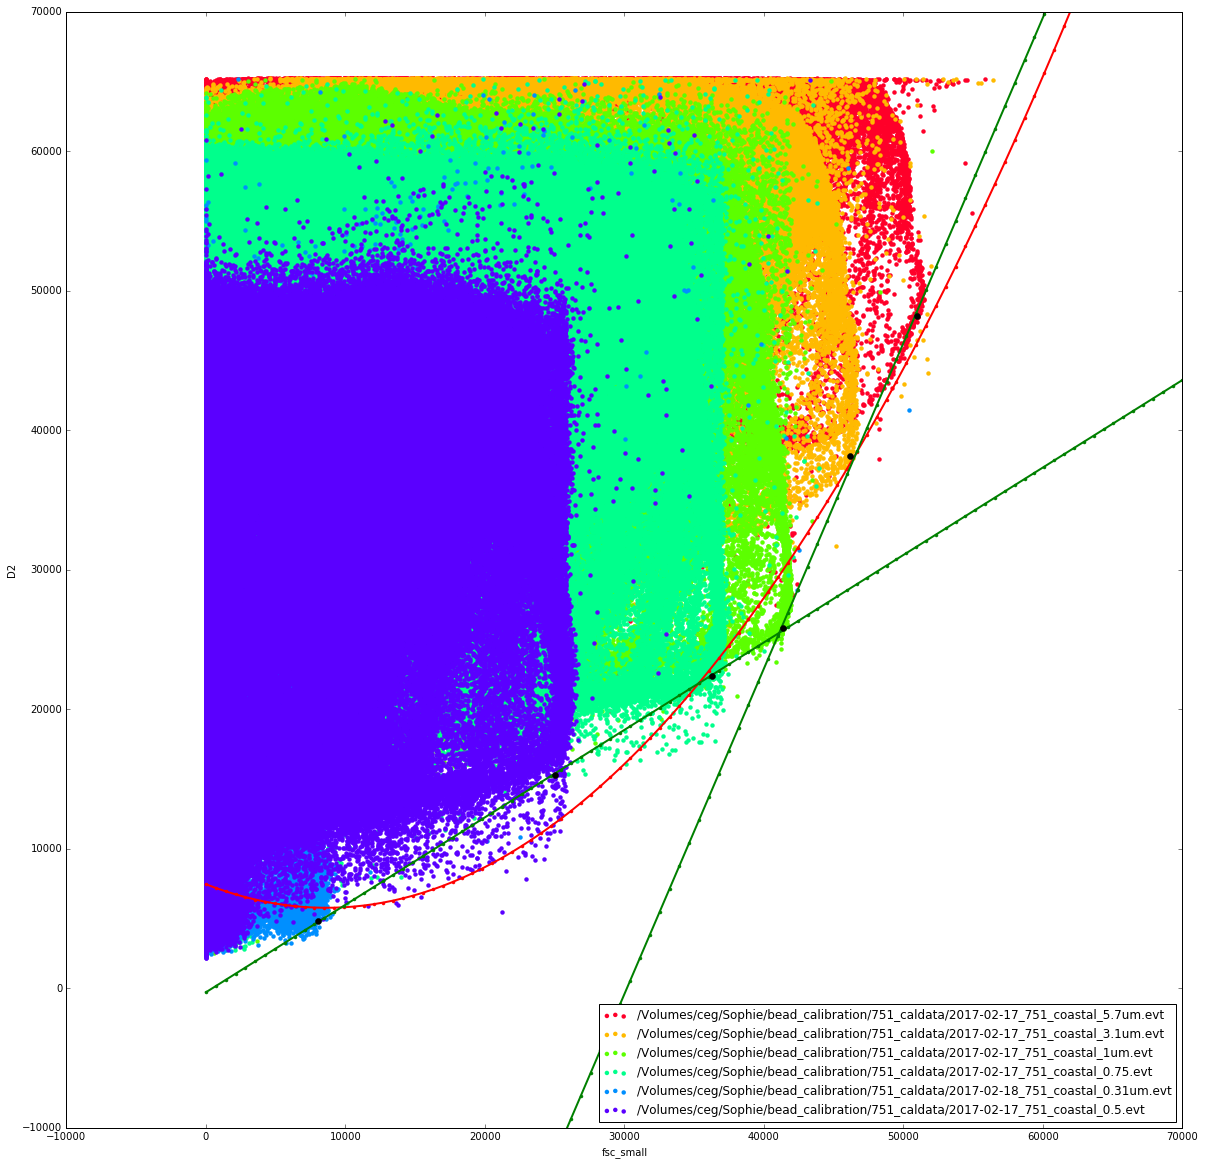

In [9]:
fig2 = plt.figure(figsize=(20,20))

num_cols = len(files)

cm = plt.get_cmap('gist_rainbow')
#for i in range(num_cols):
#    color = cm(1.*i/num_cols)

cc = 0
for f in files:
    print f
    bead_data = sfp.EVT(f, transform=False, columns=["fsc_small", "D1","D2"])
    plt.scatter(bead_data.df['fsc_small'], bead_data.df['D2'], marker ='o', lw = 0, c = cm(1.*cc/num_cols), label = f)
    cc += 1

plt.xlabel('fsc_small')
plt.ylabel('D2')
plt.legend(loc = 'lower right')

plt.plot(xp, p(xp),'.-r', lw =2)
plt.plot(xp, ps(xp),'.-g', lw =2)
plt.plot(xp, pb(xp),'.-g', lw =2)
plt.plot(guess2['fsc_small'], guess2['D2'], 'ko')
plt.axis([-10000, 70000, -10000, 70000])
plt.show()

In [11]:
# select instrument
inst = 740
instdir = "%3d_caldata" % inst

indir = "%s%s" % (datadir, instdir)
regime = 'coastal' # or oligo
regime = 'oligo'

files = glob.glob('%s/*%s*.evt' % (indir, regime))

In [12]:
% matplotlib qt

fig1 = plt.figure(figsize=(20,20))

num_cols = len(files)

cm = plt.get_cmap('gist_rainbow')
#for i in range(num_cols):
#    color = cm(1.*i/num_cols)

cc = 0
for f in files:
    print f
    bead_data = sfp.EVT(f, transform=False, columns=["fsc_small", "D1","D2"])
    plt.scatter(bead_data.df['fsc_small'], bead_data.df['D2'], marker ='o', lw = 0, c = cm(1.*cc/num_cols), label = f)
    cc += 1

plt.xlabel('fsc_small')
plt.ylabel('D2')
plt.legend(loc = 'lower right')
plt.show()

/Volumes/ceg/Sophie/bead_calibration/740_caldata/2017-02-21_740_oligo_1um.evt
/Volumes/ceg/Sophie/bead_calibration/740_caldata/2017-02-21_740_oligo_3.1um.evt
/Volumes/ceg/Sophie/bead_calibration/740_caldata/2017-02-21_740_oligo_5.7um.evt
/Volumes/ceg/Sophie/bead_calibration/740_caldata/2017-02-22_740_oligo_1.83um.evt
/Volumes/ceg/Sophie/bead_calibration/740_caldata/2017-02-21_740_oligo_0.5um.evt
/Volumes/ceg/Sophie/bead_calibration/740_caldata/2017-02-21_740_oligo_0.75um.evt
/Volumes/ceg/Sophie/bead_calibration/740_caldata/2017-02-22_740_oligo_noise.evt
/Volumes/ceg/Sophie/bead_calibration/740_caldata/2017-02-21_740_oligo_0.3um.evt


In [13]:
# best guess points for 751 oligo
#
guess3 = pd.DataFrame()
guess3['fsc_small'] = [61300, 60300, 56000, 49000, 43500, 30700]
guess3['D2'] = [55900, 50600, 39900, 30800, 24400, 14100]
guess3['bead'] = [5.7, 3.1, 1.83, 1.0, 0.75, 0.5]

# try to fit a polynomial to bead data
z = np.polyfit(guess3['fsc_small'], guess3['D2'], 2)
p = np.poly1d(z)
xp = np.linspace(0, 7e04, 100)

guess3 = guess3.sort(['bead'], ascending = 1)

small = guess3[guess3['bead']<=1]
big = guess3[guess3['bead']>=1]

# try to fit a polynomial to bead data
zs = np.polyfit(small['fsc_small'], small['D2'], 1)
ps = np.poly1d(zs)

zb = np.polyfit(big['fsc_small'], big['D2'], 1)
pb = np.poly1d(zb)

print "small", zs
print "big", zb

small [  8.93512042e-01  -1.35935612e+04]
big [  1.94983491e+00  -6.61581478e+04]


/Users/sclayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


/Volumes/ceg/Sophie/bead_calibration/740_caldata/2017-02-21_740_oligo_1um.evt
/Volumes/ceg/Sophie/bead_calibration/740_caldata/2017-02-21_740_oligo_3.1um.evt
/Volumes/ceg/Sophie/bead_calibration/740_caldata/2017-02-21_740_oligo_5.7um.evt
/Volumes/ceg/Sophie/bead_calibration/740_caldata/2017-02-22_740_oligo_1.83um.evt
/Volumes/ceg/Sophie/bead_calibration/740_caldata/2017-02-21_740_oligo_0.5um.evt
/Volumes/ceg/Sophie/bead_calibration/740_caldata/2017-02-21_740_oligo_0.75um.evt
/Volumes/ceg/Sophie/bead_calibration/740_caldata/2017-02-22_740_oligo_noise.evt
/Volumes/ceg/Sophie/bead_calibration/740_caldata/2017-02-21_740_oligo_0.3um.evt


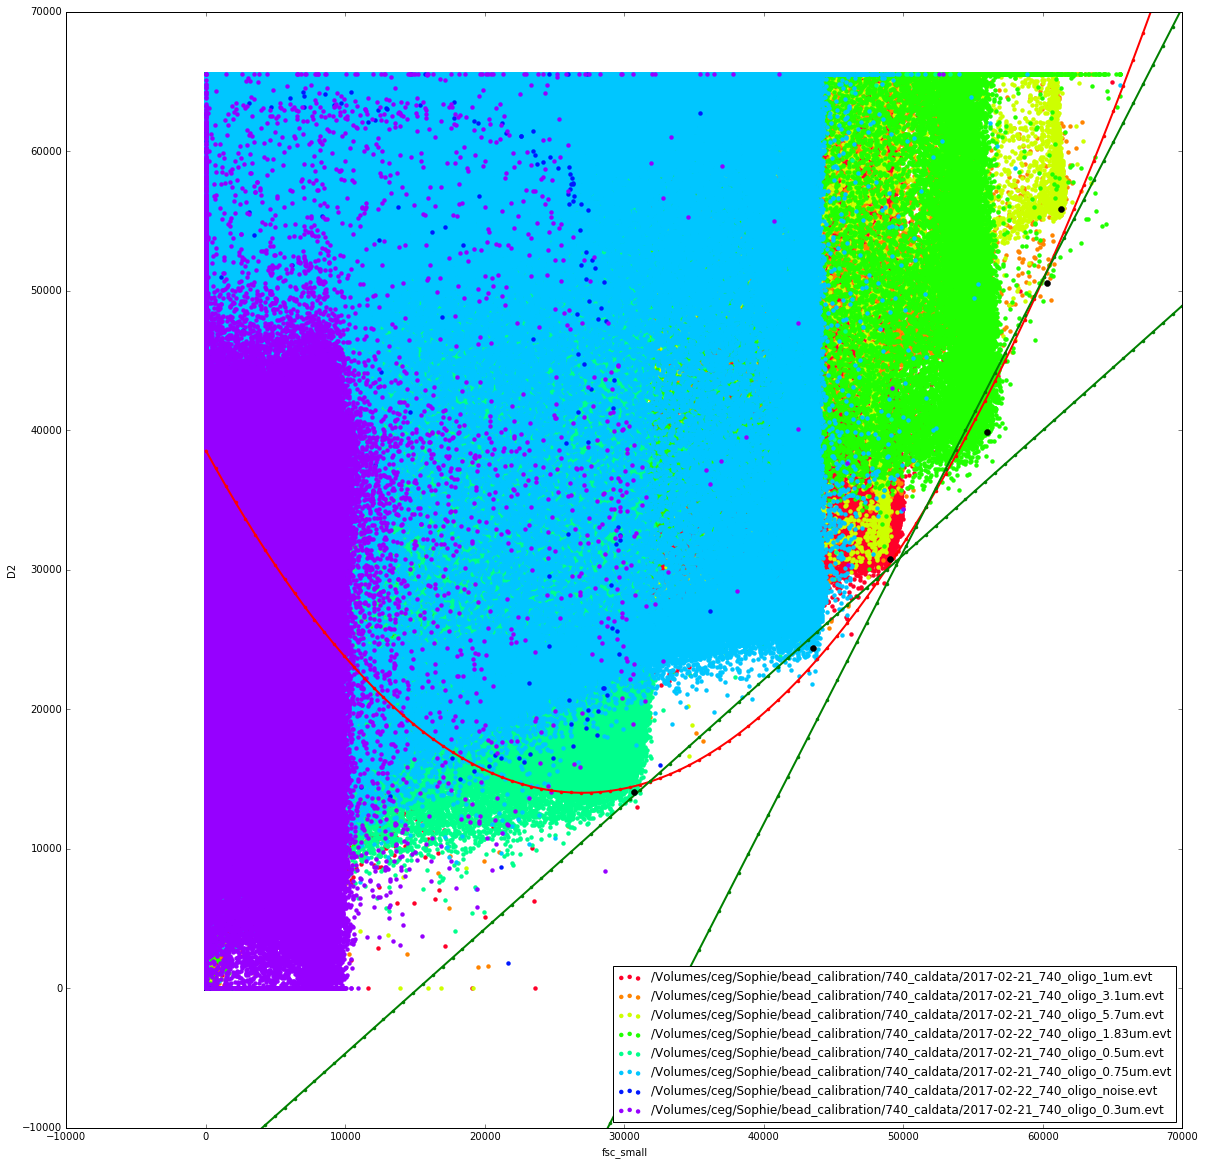

In [14]:
% matplotlib inline

fig3 = plt.figure(figsize=(20,20))

num_cols = len(files)

cm = plt.get_cmap('gist_rainbow')
#for i in range(num_cols):
#    color = cm(1.*i/num_cols)

cc = 0
for f in files:
    print f
    bead_data = sfp.EVT(f, transform=False, columns=["fsc_small", "D1","D2"])
    plt.scatter(bead_data.df['fsc_small'], bead_data.df['D2'], marker ='o', lw = 0, c = cm(1.*cc/num_cols), label = f)
    cc += 1

plt.xlabel('fsc_small')
plt.ylabel('D2')
plt.legend(loc = 'lower right')

plt.plot(xp, p(xp),'.-r', lw =2)
plt.plot(xp, ps(xp),'.-g', lw =2)
plt.plot(xp, pb(xp),'.-g', lw =2)
plt.plot(guess3['fsc_small'], guess3['D2'], 'ko')
plt.axis([-10000, 70000, -10000, 70000])
plt.show()

In [15]:
# select instrument
inst = 740
instdir = "%3d_caldata" % inst

indir = "%s%s" % (datadir, instdir)
regime = 'coastal' # or oligo
#regime = 'oligo'

files = glob.glob('%s/*%s*.evt' % (indir, regime))

In [16]:
% matplotlib qt

fig1 = plt.figure(figsize=(20,20))

num_cols = len(files)

cm = plt.get_cmap('gist_rainbow')
#for i in range(num_cols):
#    color = cm(1.*i/num_cols)

cc = 0
for f in files:
    print f
    bead_data = sfp.EVT(f, transform=False, columns=["fsc_small", "D1","D2"])
    plt.scatter(bead_data.df['fsc_small'], bead_data.df['D2'], marker ='o', lw = 0, c = cm(1.*cc/num_cols), label = f)
    cc += 1

plt.xlabel('fsc_small')
plt.ylabel('D2')
plt.legend(loc = 'lower right')
plt.show()

/Volumes/ceg/Sophie/bead_calibration/740_caldata/2017-02-22_740_coastal_5.7um.evt
/Volumes/ceg/Sophie/bead_calibration/740_caldata/2017-02-22_740_coastal_1.8um.evt
/Volumes/ceg/Sophie/bead_calibration/740_caldata/2017-02-21_740_coastal_1um.evt
/Volumes/ceg/Sophie/bead_calibration/740_caldata/2017-02-22_740_coastal_0.75um.evt
/Volumes/ceg/Sophie/bead_calibration/740_caldata/2017-02-22_740_coastal_0.5um.evt
/Volumes/ceg/Sophie/bead_calibration/740_caldata/2017-02-22_740_coastal_3.1um.evt


In [17]:
# best guess points for 751 coastal
#
guess4 = pd.DataFrame()
guess4['fsc_small'] = [51800, 46000, 46500, 38100, 33200, 19700]
guess4['D2'] = [55200, 48600, 38200, 25100, 23200, 14000]
guess4['bead'] = [5.7, 3.1, 1.83, 1.0, 0.75, 0.5]

# try to fit a polynomial to bead data
z = np.polyfit(guess4['fsc_small'], guess4['D2'], 2)
p = np.poly1d(z)
xp = np.linspace(0, 7e04, 100)

guess4 = guess4.sort(['bead'], ascending = 1)

small = guess4[guess4['bead']<=1]
big = guess4[guess4['bead']>=1]

# try to fit a polynomial to bead data
zs = np.polyfit(small['fsc_small'], small['D2'], 1)
ps = np.poly1d(zs)

zb = np.polyfit(big['fsc_small'], big['D2'], 1)
pb = np.poly1d(zb)

print "small", zs
print "big", zb

small [  6.19929518e-01   1.96213795e+03]
big [  2.17238135e+00  -5.72855896e+04]


/Users/sclayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


/Volumes/ceg/Sophie/bead_calibration/740_caldata/2017-02-22_740_coastal_5.7um.evt
/Volumes/ceg/Sophie/bead_calibration/740_caldata/2017-02-22_740_coastal_1.8um.evt
/Volumes/ceg/Sophie/bead_calibration/740_caldata/2017-02-21_740_coastal_1um.evt
/Volumes/ceg/Sophie/bead_calibration/740_caldata/2017-02-22_740_coastal_0.75um.evt
/Volumes/ceg/Sophie/bead_calibration/740_caldata/2017-02-22_740_coastal_0.5um.evt
/Volumes/ceg/Sophie/bead_calibration/740_caldata/2017-02-22_740_coastal_3.1um.evt


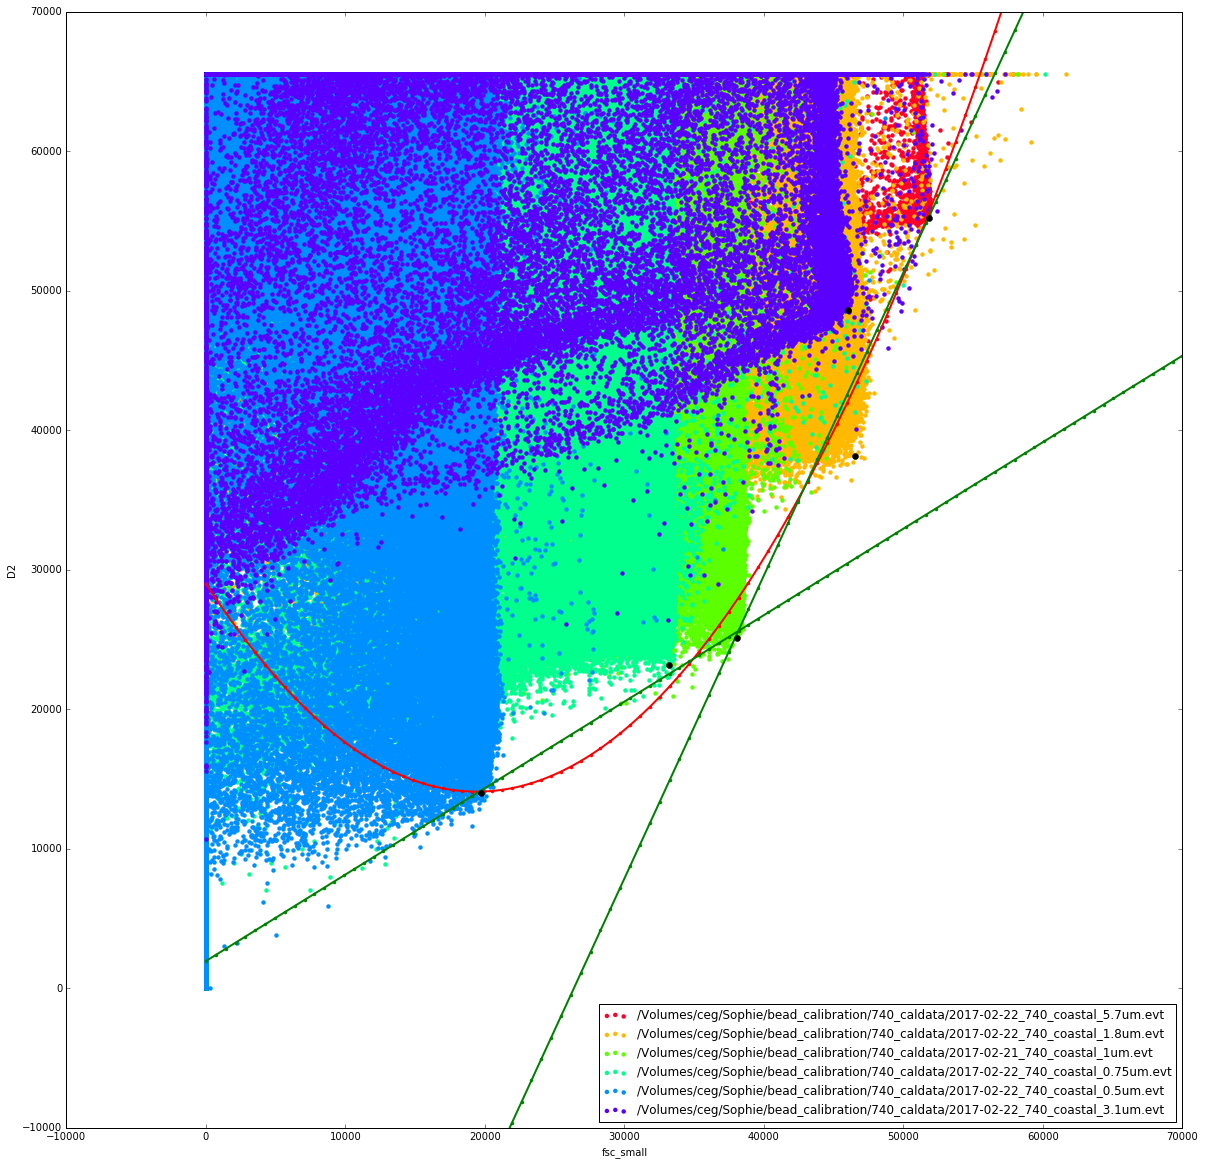

In [18]:
% matplotlib inline

fig3 = plt.figure(figsize=(20,20))

num_cols = len(files)

cm = plt.get_cmap('gist_rainbow')
#for i in range(num_cols):
#    color = cm(1.*i/num_cols)

cc = 0
for f in files:
    print f
    bead_data = sfp.EVT(f, transform=False, columns=["fsc_small", "D1","D2"])
    plt.scatter(bead_data.df['fsc_small'], bead_data.df['D2'], marker ='o', lw = 0, c = cm(1.*cc/num_cols), label = f)
    cc += 1

plt.xlabel('fsc_small')
plt.ylabel('D2')
plt.legend(loc = 'lower right')

plt.plot(xp, p(xp),'.-r', lw =2)
plt.plot(xp, ps(xp),'.-g', lw =2)
plt.plot(xp, pb(xp),'.-g', lw =2)
plt.plot(guess4['fsc_small'], guess4['D2'], 'ko')
plt.axis([-10000, 70000, -10000, 70000])
plt.show()

In [19]:
# select instrument
inst = 989
instdir = "%3d_caldata" % inst

indir = "%s%s" % (datadir, instdir)
regime = 'coastal' # or oligo
#regime = 'oligo'

files = glob.glob('%s/*%s*.evt' % (indir, regime))

In [20]:
% matplotlib qt

fig1 = plt.figure(figsize=(20,20))

num_cols = len(files)

cm = plt.get_cmap('gist_rainbow')
#for i in range(num_cols):
#    color = cm(1.*i/num_cols)

cc = 0
for f in files:
    print f
    bead_data = sfp.EVT(f, transform=False, columns=["fsc_small", "D1","D2"])
    plt.scatter(bead_data.df['fsc_small'], bead_data.df['D2'], marker ='o', lw = 0, c = cm(1.*cc/num_cols), label = f)
    cc += 1

plt.xlabel('fsc_small')
plt.ylabel('D2')
plt.legend(loc = 'lower right')
plt.show()

/Volumes/ceg/Sophie/bead_calibration/989_caldata/2017-02-28_989_coastal_3.1um.evt
/Volumes/ceg/Sophie/bead_calibration/989_caldata/2017-03-01_989_coastal_1.83um.evt
/Volumes/ceg/Sophie/bead_calibration/989_caldata/2017-03-01_989_coastal_0.5um.evt
/Volumes/ceg/Sophie/bead_calibration/989_caldata/2017-02-28_989_coastal_1.0um.evt
/Volumes/ceg/Sophie/bead_calibration/989_caldata/2017-03-01_989_coastal_noise.evt
/Volumes/ceg/Sophie/bead_calibration/989_caldata/2017-02-28_989_coastal_5.7um.evt
/Volumes/ceg/Sophie/bead_calibration/989_caldata/2017-03-01_989_coastal_0.3um.evt
/Volumes/ceg/Sophie/bead_calibration/989_caldata/2017-03-01_989_coastal_0.75um.evt


In [21]:
# best guess points for 989 coastal
#
guess5 = pd.DataFrame()
guess5['fsc_small'] = [51100, 47200, 45300, 40700, 35700, 23700]
guess5['D2'] = [38800, 34800, 28300, 22400, 19000, 7800]
guess5['bead'] = [5.7, 3.1, 1.83, 1.0, 0.75, 0.5]

# try to fit a polynomial to bead data
z = np.polyfit(guess5['fsc_small'], guess5['D2'], 2)
p = np.poly1d(z)
xp = np.linspace(0, 7e04, 100)

guess5 = guess5.sort(['bead'], ascending = 1)

small = guess5[guess5['bead']<=1]
big = guess5[guess5['bead']>=1]

# try to fit a polynomial to bead data
zs = np.polyfit(small['fsc_small'], small['D2'], 1)
ps = np.poly1d(zs)

zb = np.polyfit(big['fsc_small'], big['D2'], 1)
pb = np.poly1d(zb)

print "small", zs
print "big", zb

small [  8.72489083e-01  -1.27120524e+04]
big [  1.63884301e+00  -4.44346918e+04]


/Users/sclayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


/Volumes/ceg/Sophie/bead_calibration/989_caldata/2017-02-28_989_coastal_3.1um.evt
/Volumes/ceg/Sophie/bead_calibration/989_caldata/2017-03-01_989_coastal_1.83um.evt
/Volumes/ceg/Sophie/bead_calibration/989_caldata/2017-03-01_989_coastal_0.5um.evt
/Volumes/ceg/Sophie/bead_calibration/989_caldata/2017-02-28_989_coastal_1.0um.evt
/Volumes/ceg/Sophie/bead_calibration/989_caldata/2017-03-01_989_coastal_noise.evt
/Volumes/ceg/Sophie/bead_calibration/989_caldata/2017-02-28_989_coastal_5.7um.evt
/Volumes/ceg/Sophie/bead_calibration/989_caldata/2017-03-01_989_coastal_0.3um.evt
/Volumes/ceg/Sophie/bead_calibration/989_caldata/2017-03-01_989_coastal_0.75um.evt


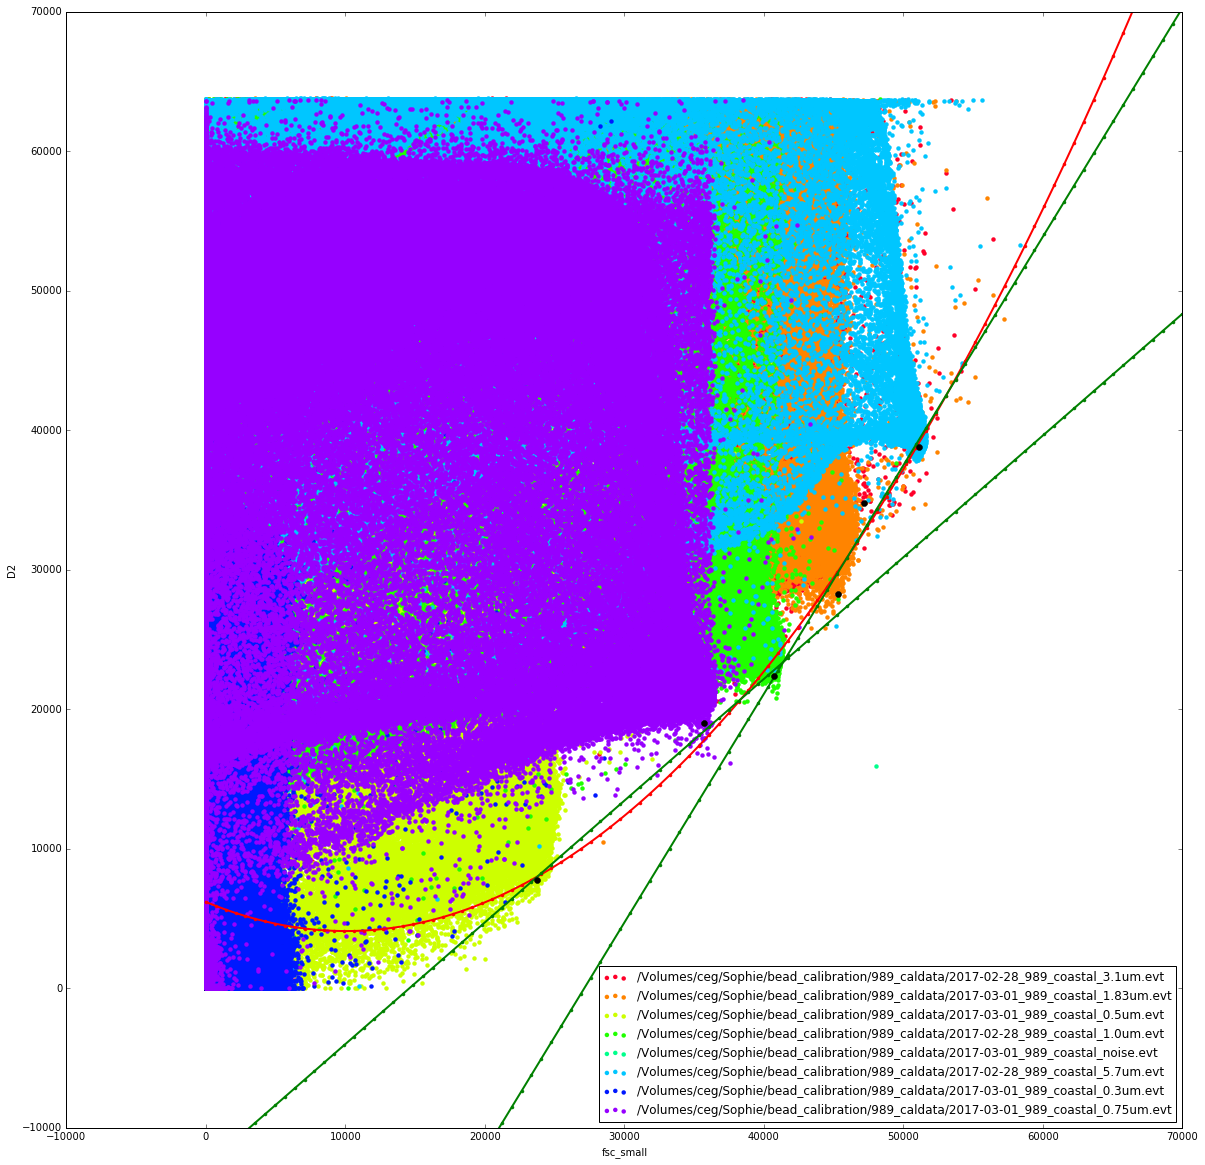

In [23]:
% matplotlib inline

fig3 = plt.figure(figsize=(20,20))

num_cols = len(files)

cm = plt.get_cmap('gist_rainbow')
#for i in range(num_cols):
#    color = cm(1.*i/num_cols)

cc = 0
for f in files:
    print f
    bead_data = sfp.EVT(f, transform=False, columns=["fsc_small", "D1","D2"])
    plt.scatter(bead_data.df['fsc_small'], bead_data.df['D2'], marker ='o', lw = 0, c = cm(1.*cc/num_cols), label = f)
    cc += 1

plt.xlabel('fsc_small')
plt.ylabel('D2')
plt.legend(loc = 'lower right')

plt.plot(xp, p(xp),'.-r', lw =2)
plt.plot(xp, ps(xp),'.-g', lw =2)
plt.plot(xp, pb(xp),'.-g', lw =2)
plt.plot(guess5['fsc_small'], guess5['D2'], 'ko')
plt.axis([-10000, 70000, -10000, 70000])
plt.show()

In [24]:
# select instrument
inst = 989
instdir = "%3d_caldata" % inst

indir = "%s%s" % (datadir, instdir)
regime = 'oligo'

files = glob.glob('%s/*%s*.evt' % (indir, regime))

In [29]:
% matplotlib qt

fig1 = plt.figure(figsize=(20,20))

num_cols = len(files)

cm = plt.get_cmap('gist_rainbow')
#for i in range(num_cols):
#    color = cm(1.*i/num_cols)

cc = 0
for f in files:
    print f
    bead_data = sfp.EVT(f, transform=False, columns=["fsc_small", "D1","D2"])
    plt.scatter(bead_data.df['fsc_small'], bead_data.df['D2'], marker ='o', lw = 0, c = cm(1.*cc/num_cols), label = f)
    cc += 1

plt.xlabel('fsc_small')
plt.ylabel('D2')
plt.legend(loc = 'lower right')
plt.show()

/Volumes/ceg/Sophie/bead_calibration/989_caldata/2017-02-28_989_oligo_0.3um.evt
/Volumes/ceg/Sophie/bead_calibration/989_caldata/2017-02-28_989_oligo_0.75um.evt
/Volumes/ceg/Sophie/bead_calibration/989_caldata/2017-03-01_989_oligo_noise.evt
/Volumes/ceg/Sophie/bead_calibration/989_caldata/2017-02-28_989_oligo_1.83um.evt
/Volumes/ceg/Sophie/bead_calibration/989_caldata/2017-02-28_989_oligo_5.7um.evt
/Volumes/ceg/Sophie/bead_calibration/989_caldata/2017-02-28_989_oligo_3.1um.evt
/Volumes/ceg/Sophie/bead_calibration/989_caldata/2017-02-28_989_oligo_1.0um.evt
/Volumes/ceg/Sophie/bead_calibration/989_caldata/2017-02-28_989_oligo_0.5um.evt


In [30]:
# best guess points for 989 oligo
#
guess6 = pd.DataFrame()
guess6['fsc_small'] = [60400, 55200, 54900, 50800, 45900, 35200]
guess6['D2'] = [41600, 33000, 31300, 24800, 20500, 10600]
guess6['bead'] = [5.7, 3.1, 1.83, 1.0, 0.75, 0.5]

# try to fit a polynomial to bead data
z = np.polyfit(guess6['fsc_small'], guess6['D2'], 2)
p = np.poly1d(z)
xp = np.linspace(0, 7e04, 100)

guess6 = guess6.sort(['bead'], ascending = 1)

small = guess6[guess6['bead']<=1]
big = guess6[guess6['bead']>=1]

# try to fit a polynomial to bead data
zs = np.polyfit(small['fsc_small'], small['D2'], 1)
ps = np.poly1d(zs)

zb = np.polyfit(big['fsc_small'], big['D2'], 1)
pb = np.poly1d(zb)

print "small", zs
print "big", zb

small [  9.12690515e-01  -2.14946263e+04]
big [  1.75483280e+00  -6.44111249e+04]


/Users/sclayton/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


/Volumes/ceg/Sophie/bead_calibration/989_caldata/2017-02-28_989_oligo_0.3um.evt
/Volumes/ceg/Sophie/bead_calibration/989_caldata/2017-02-28_989_oligo_0.75um.evt
/Volumes/ceg/Sophie/bead_calibration/989_caldata/2017-03-01_989_oligo_noise.evt
/Volumes/ceg/Sophie/bead_calibration/989_caldata/2017-02-28_989_oligo_1.83um.evt
/Volumes/ceg/Sophie/bead_calibration/989_caldata/2017-02-28_989_oligo_5.7um.evt
/Volumes/ceg/Sophie/bead_calibration/989_caldata/2017-02-28_989_oligo_3.1um.evt
/Volumes/ceg/Sophie/bead_calibration/989_caldata/2017-02-28_989_oligo_1.0um.evt
/Volumes/ceg/Sophie/bead_calibration/989_caldata/2017-02-28_989_oligo_0.5um.evt


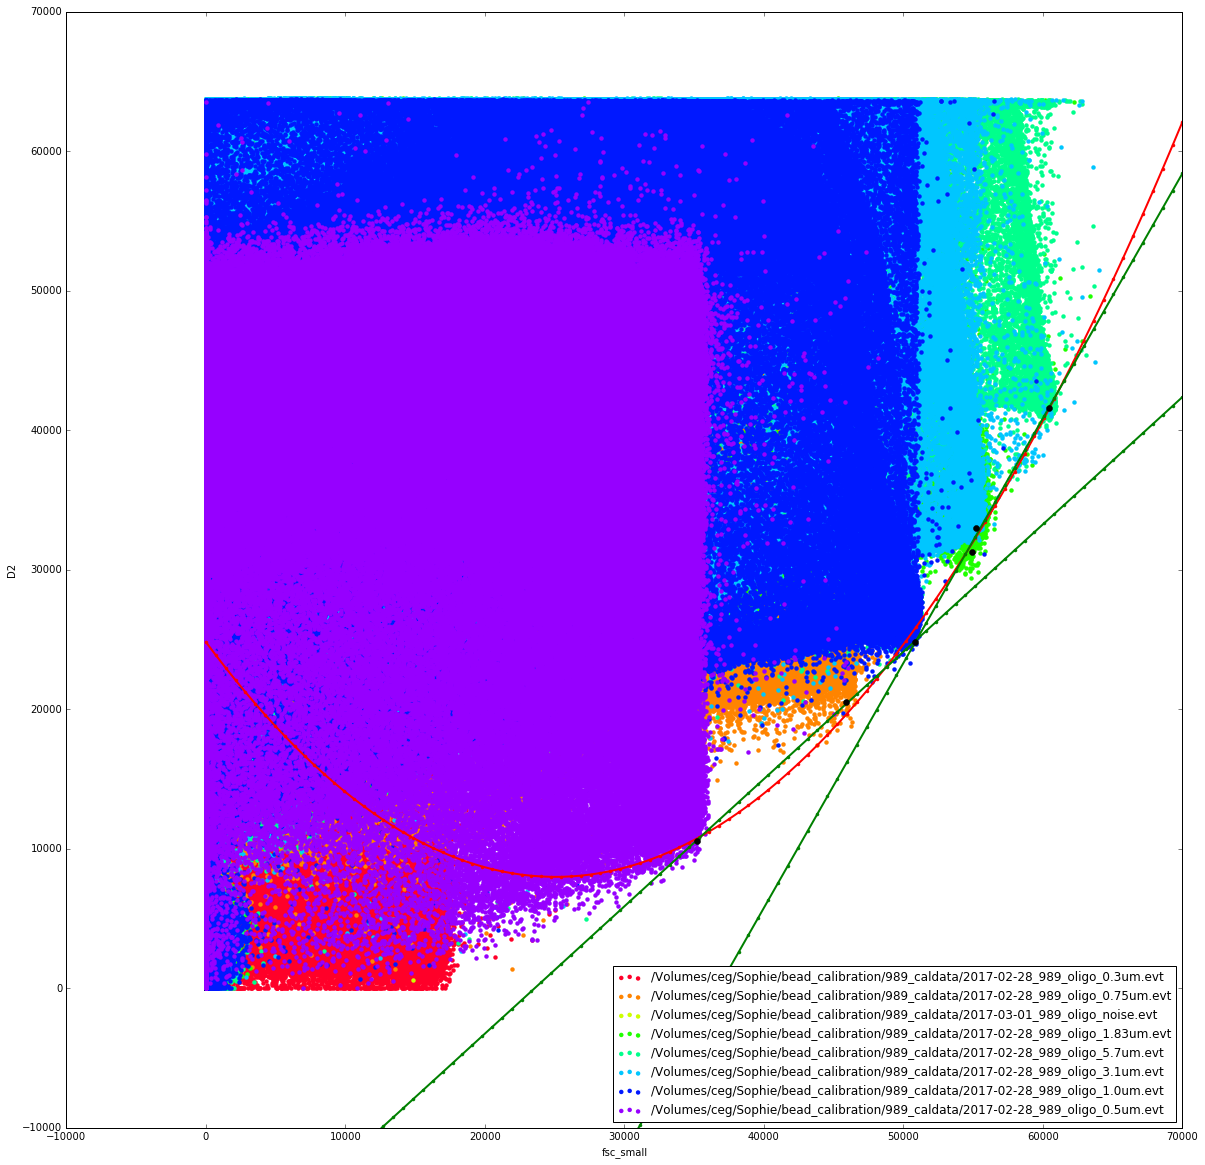

In [31]:
% matplotlib inline

fig3 = plt.figure(figsize=(20,20))

num_cols = len(files)

cm = plt.get_cmap('gist_rainbow')
#for i in range(num_cols):
#    color = cm(1.*i/num_cols)

cc = 0
for f in files:
    print f
    bead_data = sfp.EVT(f, transform=False, columns=["fsc_small", "D1","D2"])
    plt.scatter(bead_data.df['fsc_small'], bead_data.df['D2'], marker ='o', lw = 0, c = cm(1.*cc/num_cols), label = f)
    cc += 1

plt.xlabel('fsc_small')
plt.ylabel('D2')
plt.legend(loc = 'lower right')

plt.plot(xp, p(xp),'.-r', lw =2)
plt.plot(xp, ps(xp),'.-g', lw =2)
plt.plot(xp, pb(xp),'.-g', lw =2)
plt.plot(guess6['fsc_small'], guess6['D2'], 'ko')
plt.axis([-10000, 70000, -10000, 70000])
plt.show()